In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
import joblib

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
dataframe = pd.read_csv('space_decay.csv')

In [ ]:
dataframe.head(2)

,CCSDS_OMM_VERS,COMMENT,CREATION_DATE,ORIGINATOR,OBJECT_NAME,OBJECT_ID,CENTER_NAME,REF_FRAME,TIME_SYSTEM,MEAN_ELEMENT_THEORY,...,RCS_SIZE,COUNTRY_CODE,LAUNCH_DATE,SITE,DECAY_DATE,FILE,GP_ID,TLE_LINE0,TLE_LINE1,TLE_LINE2
0,2,GENERATED VIA SPACE-TRACK.ORG API,2021-11-01T06:46:11,18 SPCS,ARIANE 42P+ DEB,1992-072J,EARTH,TEME,UTC,SGP4,...,MEDIUM,FR,1992.0,FRGUI,NaN,3195178,188614016,0 ARIANE 42P+ DEB,1 26741U 92072J 21304.94919376 .00000883 0...,2 26741 7.7156 90.2410 6528926 243.1216 38...
1,2,GENERATED VIA SPACE-TRACK.ORG API,2021-11-01T04:58:37,18 SPCS,SL-8 DEB,1979-028C,EARTH,TEME,UTC,SGP4,...,SMALL,CIS,1979.0,PKMTR,NaN,3194950,188593285,0 SL-8 DEB,1 26743U 79028C 21304.68908982 .00000079 0...,2 26743 82.9193 299.1120 0030720 158.9093 201...


In [ ]:
dataframe.shape

(14372, 40)

In [ ]:
dataframe.dtypes

CCSDS_OMM_VERS           int64
COMMENT                 object
CREATION_DATE           object
ORIGINATOR              object
OBJECT_NAME             object
OBJECT_ID               object
CENTER_NAME             object
REF_FRAME               object
TIME_SYSTEM             object
MEAN_ELEMENT_THEORY     object
EPOCH                   object
MEAN_MOTION            float64
ECCENTRICITY           float64
INCLINATION            float64
RA_OF_ASC_NODE         float64
ARG_OF_PERICENTER      float64
MEAN_ANOMALY           float64
EPHEMERIS_TYPE           int64
CLASSIFICATION_TYPE     object
NORAD_CAT_ID             int64
ELEMENT_SET_NO           int64
REV_AT_EPOCH             int64
BSTAR                  float64
MEAN_MOTION_DOT        float64
MEAN_MOTION_DDOT       float64
SEMIMAJOR_AXIS         float64
PERIOD                 float64
APOAPSIS               float64
PERIAPSIS              float64
OBJECT_TYPE             object
RCS_SIZE                object
COUNTRY_CODE            object
LAUNCH_D

In [ ]:
dataframe.isna().sum()

CCSDS_OMM_VERS             0
COMMENT                    0
CREATION_DATE              0
ORIGINATOR                 0
OBJECT_NAME                0
OBJECT_ID                 39
CENTER_NAME                0
REF_FRAME                  0
TIME_SYSTEM                0
MEAN_ELEMENT_THEORY        0
EPOCH                      0
MEAN_MOTION                0
ECCENTRICITY               0
INCLINATION                0
RA_OF_ASC_NODE             0
ARG_OF_PERICENTER          0
MEAN_ANOMALY               0
EPHEMERIS_TYPE             0
CLASSIFICATION_TYPE        0
NORAD_CAT_ID               0
ELEMENT_SET_NO             0
REV_AT_EPOCH               0
BSTAR                      0
MEAN_MOTION_DOT            0
MEAN_MOTION_DDOT           0
SEMIMAJOR_AXIS             0
PERIOD                     0
APOAPSIS                   0
PERIAPSIS                  0
OBJECT_TYPE                0
RCS_SIZE                 198
COUNTRY_CODE              39
LAUNCH_DATE               39
SITE                      39
DECAY_DATE    

In [ ]:
dataframe = dataframe.drop(columns = ['DECAY_DATE'])

In [ ]:
dataframe['RCS_SIZE'].unique()

array(['MEDIUM', 'SMALL', 'LARGE', nan], dtype=object)

In [ ]:
dataframe = dataframe[dataframe['RCS_SIZE'].notna()]

In [ ]:
dataframe.dtypes

CCSDS_OMM_VERS           int64
COMMENT                 object
CREATION_DATE           object
ORIGINATOR              object
OBJECT_NAME             object
OBJECT_ID               object
CENTER_NAME             object
REF_FRAME               object
TIME_SYSTEM             object
MEAN_ELEMENT_THEORY     object
EPOCH                   object
MEAN_MOTION            float64
ECCENTRICITY           float64
INCLINATION            float64
RA_OF_ASC_NODE         float64
ARG_OF_PERICENTER      float64
MEAN_ANOMALY           float64
EPHEMERIS_TYPE           int64
CLASSIFICATION_TYPE     object
NORAD_CAT_ID             int64
ELEMENT_SET_NO           int64
REV_AT_EPOCH             int64
BSTAR                  float64
MEAN_MOTION_DOT        float64
MEAN_MOTION_DDOT       float64
SEMIMAJOR_AXIS         float64
PERIOD                 float64
APOAPSIS               float64
PERIAPSIS              float64
OBJECT_TYPE             object
RCS_SIZE                object
COUNTRY_CODE            object
LAUNCH_D

In [ ]:
    # eccentricity = row['ECCENTRICITY']
    # inclination = row['INCLINATION']
    # semi_major_axis = row['SEMIMAJOR_AXIS']

dataframe[['ECCENTRICITY' , 'INCLINATION' , 'SEMIMAJOR_AXIS']].describe()

,ECCENTRICITY,INCLINATION,SEMIMAJOR_AXIS
count,14174.000000,14174.000000,14174.000000
mean,0.063655,75.050788,10381.409239
std,0.178477,29.024966,8856.388961
min,0.000005,0.001400,6542.850000
25%,0.000701,53.055600,6953.224000
50%,0.003314,86.392850,7174.004000
75%,0.012941,98.578300,7433.195250
max,0.897218,144.586200,182331.558000


https://space.stackexchange.com/questions/23450/determine-orbit-type-from-tle#:~:text=We%20can%20use%20the%20following,35%2C786km).


In [ ]:
def categorize_orbit(row):
    eccentricity = row['ECCENTRICITY']
    mean_motion = row['MEAN_MOTION']
    period = row['PERIOD']

    if eccentricity > 0.25:
        return 'HEO'  # Highly Elliptical Orbit
    elif (0.99 <= mean_motion <= 1.01) and eccentricity < 0.01:
        return 'GEO'  # Geostationary Orbit
    elif (600 <= period <= 800) and eccentricity < 0.25:
        return 'MEO'  # Medium Earth Orbit
    elif mean_motion > 11.25 and eccentricity < 0.25:
        return 'LEO'  # Low Earth Orbit
    else:
        return 'Other'

dataframe['ORBIT_TYPE'] = dataframe.apply(categorize_orbit, axis=1)

In [ ]:
dataframe['ORBIT_TYPE'].unique()

array(['HEO', 'LEO', 'Other', 'GEO', 'MEO'], dtype=object)

In [ ]:
print(dataframe[dataframe['ORBIT_TYPE'] == 'Other'].count().sum())
print(dataframe[dataframe['ORBIT_TYPE'] == 'HEO'].count().sum())
print(dataframe[dataframe['ORBIT_TYPE'] == 'LEO'].count().sum())
print(dataframe[dataframe['ORBIT_TYPE'] == 'GEO'].count().sum())
print(dataframe[dataframe['ORBIT_TYPE'] == 'MEO'].count().sum())

10160
50240
478200
21760
6600


In [ ]:
dataframe['CURRENT_YEAR'] = 2023
dataframe["OBJECT_AGE"] = dataframe.CURRENT_YEAR - dataframe.LAUNCH_DATE

dataframe.RCS_SIZE = dataframe.RCS_SIZE.map({'SMALL':1, 'MEDIUM':2, 'LARGE':3})

dataframe['ORBIT_TYPE_MAPPED'] = dataframe.ORBIT_TYPE.map({'Other':0, 'HEO':1, 'LEO':2, 'GEO':3, 'MEO':4})

In [ ]:
dataframe[["OBJECT_AGE","RCS_SIZE","APOAPSIS","PERIAPSIS","MEAN_ANOMALY","MEAN_MOTION",
           "INCLINATION","PERIOD","ECCENTRICITY","ORBIT_TYPE"
           ,"ORBIT_TYPE_MAPPED"]].corr().style.background_gradient()

ValueError: could not convert string to float: 'HEO'

In [ ]:
# finalAnalysisColumns = [
# "OBJECT_AGE",
# "RCS_SIZE",
# "APOAPSIS",
# "PERIAPSIS",
# "MEAN_ANOMALY",
# "MEAN_MOTION",
# "INCLINATION",
# "PERIOD",
# "ECCENTRICITY",
# "ORBIT_TYPE_MAPPED"]

# columnsForSize = ["OBJECT_AGE","APOAPSIS","PERIAPSIS","PERIOD","ECCENTRICITY"]

In [ ]:
# dataframe = dataframe[finalAnalysisColumns]

In [ ]:
dataframe.head(2)

,CCSDS_OMM_VERS,COMMENT,CREATION_DATE,ORIGINATOR,OBJECT_NAME,OBJECT_ID,CENTER_NAME,REF_FRAME,TIME_SYSTEM,MEAN_ELEMENT_THEORY,...,SITE,FILE,GP_ID,TLE_LINE0,TLE_LINE1,TLE_LINE2,ORBIT_TYPE,CURRENT_YEAR,OBJECT_AGE,ORBIT_TYPE_MAPPED
0,2,GENERATED VIA SPACE-TRACK.ORG API,2021-11-01T06:46:11,18 SPCS,ARIANE 42P+ DEB,1992-072J,EARTH,TEME,UTC,SGP4,...,FRGUI,3195178,188614016,0 ARIANE 42P+ DEB,1 26741U 92072J 21304.94919376 .00000883 0...,2 26741 7.7156 90.2410 6528926 243.1216 38...,HEO,2023,31.0,1
1,2,GENERATED VIA SPACE-TRACK.ORG API,2021-11-01T04:58:37,18 SPCS,SL-8 DEB,1979-028C,EARTH,TEME,UTC,SGP4,...,PKMTR,3194950,188593285,0 SL-8 DEB,1 26743U 79028C 21304.68908982 .00000079 0...,2 26743 82.9193 299.1120 0030720 158.9093 201...,LEO,2023,44.0,2


In [ ]:
dataframe.dtypes

CCSDS_OMM_VERS           int64
COMMENT                 object
CREATION_DATE           object
ORIGINATOR              object
OBJECT_NAME             object
OBJECT_ID               object
CENTER_NAME             object
REF_FRAME               object
TIME_SYSTEM             object
MEAN_ELEMENT_THEORY     object
EPOCH                   object
MEAN_MOTION            float64
ECCENTRICITY           float64
INCLINATION            float64
RA_OF_ASC_NODE         float64
ARG_OF_PERICENTER      float64
MEAN_ANOMALY           float64
EPHEMERIS_TYPE           int64
CLASSIFICATION_TYPE     object
NORAD_CAT_ID             int64
ELEMENT_SET_NO           int64
REV_AT_EPOCH             int64
BSTAR                  float64
MEAN_MOTION_DOT        float64
MEAN_MOTION_DDOT       float64
SEMIMAJOR_AXIS         float64
PERIOD                 float64
APOAPSIS               float64
PERIAPSIS              float64
OBJECT_TYPE             object
RCS_SIZE                 int64
COUNTRY_CODE            object
LAUNCH_D

In [ ]:
numeric_columns = dataframe.select_dtypes(include=['int64', 'float64'])

numeric_columns = numeric_columns.drop(['ORBIT_TYPE_MAPPED'], axis=1)

numeric_columns = numeric_columns.abs()

X = numeric_columns.drop('RCS_SIZE', axis=1)
y = dataframe['RCS_SIZE']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

best_features = SelectKBest(score_func=chi2, k='all')
fit = best_features.fit(X_scaled, y)

feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': fit.scores_})
best_features = feature_scores.nlargest(10, 'Score')

print(best_features)

           Feature        Score
10    REV_AT_EPOCH  1058.298533
22      OBJECT_AGE  1019.092773
17       PERIAPSIS   758.029669
2     ECCENTRICITY   606.767950
18     LAUNCH_DATE   389.286643
3      INCLINATION   366.204790
14  SEMIMAJOR_AXIS   233.545600
8     NORAD_CAT_ID   232.078304
16        APOAPSIS   167.624081
1      MEAN_MOTION   164.510244


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00       244
           2       1.00      1.00      1.00      2392
           3       1.00      1.00      1.00       118
           4       1.00      1.00      1.00        28

    accuracy                           1.00      2835
   macro avg       1.00      1.00      1.00      2835
weighted avg       1.00      1.00      1.00      2835



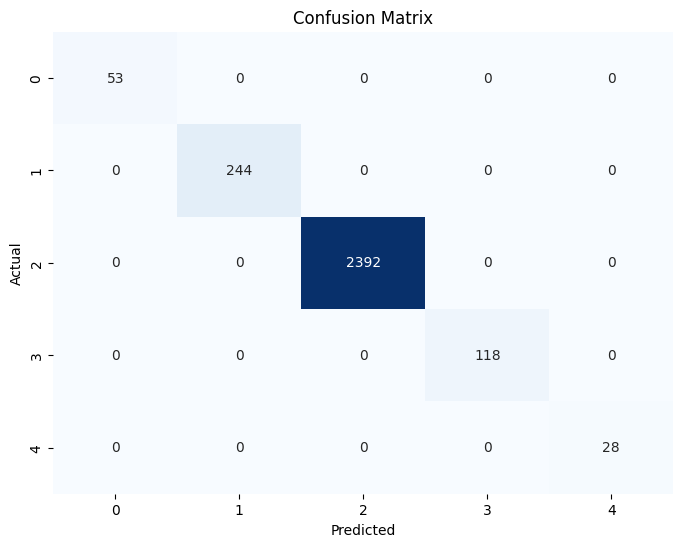

In [ ]:
X = dataframe[['ECCENTRICITY', 'MEAN_MOTION', 'PERIOD']]
y = dataframe['ORBIT_TYPE_MAPPED']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = RandomForestClassifier(random_state=42)

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
X.head()

,ECCENTRICITY,MEAN_MOTION,PERIOD
0,0.652893,2.921700,492.864
1,0.003072,13.754973,104.689
2,0.023739,1.038224,1386.984
3,0.006062,14.775907,97.456
4,0.006226,14.724482,97.796


In [ ]:
X = np.array([["0.652893", '2.921700', '492.864' ]])
X

array([['0.652893', '2.921700', '492.864']], dtype='<U8')

In [ ]:
y_pred = classifier.predict(X)
y_pred

C:\Users\jahna\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [ ]:
dataframe.columns

Index(['CCSDS_OMM_VERS', 'COMMENT', 'CREATION_DATE', 'ORIGINATOR',
       'OBJECT_NAME', 'OBJECT_ID', 'CENTER_NAME', 'REF_FRAME', 'TIME_SYSTEM',
       'MEAN_ELEMENT_THEORY', 'EPOCH', 'MEAN_MOTION', 'ECCENTRICITY',
       'INCLINATION', 'RA_OF_ASC_NODE', 'ARG_OF_PERICENTER', 'MEAN_ANOMALY',
       'EPHEMERIS_TYPE', 'CLASSIFICATION_TYPE', 'NORAD_CAT_ID',
       'ELEMENT_SET_NO', 'REV_AT_EPOCH', 'BSTAR', 'MEAN_MOTION_DOT',
       'MEAN_MOTION_DDOT', 'SEMIMAJOR_AXIS', 'PERIOD', 'APOAPSIS', 'PERIAPSIS',
       'OBJECT_TYPE', 'RCS_SIZE', 'COUNTRY_CODE', 'LAUNCH_DATE', 'SITE',
       'FILE', 'GP_ID', 'TLE_LINE0', 'TLE_LINE1', 'TLE_LINE2', 'ORBIT_TYPE',
       'CURRENT_YEAR', 'OBJECT_AGE', 'ORBIT_TYPE_MAPPED'],
      dtype='object')

In [ ]:
dataframe['PERIOD'].value_counts()

PERIOD
95.592     1112
95.593      203
95.591      101
100.403      68
109.547      33
           ... 
98.809        1
95.934        1
99.889        1
98.751        1
95.437        1
Name: count, Length: 8935, dtype: int64

In [ ]:
y_pred = model.predict(X)
y_pred

array([1, 2, 0, ..., 0, 2, 2], dtype=int64)

In [ ]:
# joblib.dump(classifier, 'orbit_classifier_model.pkl')

['orbit_classifier_model.pkl']

In [ ]:
# loaded_classifier = joblib.load('orbit_classifier_model.pkl')

# input_data = {
#     'ECCENTRICITY': [1236],
#     'MEAN_MOTION': [123.5],
#     'PERIOD': [34]
# }

# input_df = pd.DataFrame(input_data)

# predicted_class = loaded_classifier.predict(input_df)
# print("Predicted ORBIT_TYPE_MAPPED:", predicted_class[0])

# orbit_type_map = {0: 'Other', 1: 'HEO', 2: 'LEO', 3: 'GEO', 4: 'MEO'}
# predicted_orbit_type = orbit_type_map[predicted_class[0]]
# print("Predicted Orbit Type:", predicted_orbit_type)

Predicted ORBIT_TYPE_MAPPED: 2
Predicted Orbit Type: LEO


In [ ]:
import pickle

In [ ]:
data = {
    'model':classifier,
    'ECCENTRICITY': [1236],
    'MEAN_MOTION': [123.5],
    'PERIOD': [34]
}

In [ ]:
with open('orbitclassifier.pkl', 'wb') as file:
    pickle.dump(data, file)

In [ ]:
with open('orbitclassifier.pkl', 'rb') as file:
    data = pickle.load(file)

model= data["model"]
eccentricity= data["ECCENTRICITY"]
mean_motion= data["MEAN_MOTION"]
period= data["PERIOD"]


In [ ]:
y_pred = model.predict(X)
y_pred

array([1, 2, 0, ..., 0, 2, 2], dtype=int64)